#   Comparative Legal Judgment Prediction Using Statistical and Embedding-based Models

Course: CM3060 Natural Language Processing

Author: Yue Wu

Date: Jun 30, 2025

## I. Introduction

### Literature Review

1. **Introduction to Legal Judgment Prediction (LJP)**

**Legal Judgment Prediction (LJP)** lies at the intersection of legal intelligence and artificial intelligence, aiming to forecast judicial outcomes—such as charges, applicable laws, and penalties—from textual case descriptions [3, 4]. This computational task has evolved from early quantitative analyses in the 1980s to sophisticated machine learning approaches, driven by the increasing digitization of legal documents and advances in Natural Language Processing (NLP) technologies.

LJP systems have practical applications in judicial support and legal advisory services. However, legal reasoning involves ambiguous language and complex context, making automation challenging.

2. **From Traditional to Deep Learning Approaches**

Early LJP research relied heavily on traditional **statistical models**. The systematic review by Dina et al. reveals that Support Vector Machines (SVM) dominated early research, appearing in 23 studies, followed by Random Forest (14 studies) and Naive Bayes (9 studies) [3]. These models, though foundational, often struggled with the semantic depth of legal texts.

The transition to **deep learning** has marked a paradigmatic shift in LJP research. Wang et al. showed that transformer-based models like BERT improved accuracy by 8–10% over traditional baselines [9]. Cross-jurisdictional studies also showed these models' adaptability across legal systems [1, 6, 8].

Recently, **interpretable legal reasoning** gains public attention along with the rapid development of Large Language Models (LLMs), particularly reasoning LLMs. Xu et al. enhanced model interpretability by introducing "seriousness of charges" as an auxiliary task, allowing attention mechanisms to better capture penalty-related features [12]. Deng et al. formalized LJP using syllogistic reasoning, breaking it into article retrieval, criminal element generation, article interpretation, and final prediction[2]. This approach mirrors actual judicial reasoning processes, enhancing both accuracy and interpretability.

3. **Domain-Specific Knowledge Integration**

Incorporating legal domain knowledge has become key to improving LJP performance.

Xu et al. introduced a novel graph neural network approach (LADAN) that distinguishes confusing law articles by learning subtle differences between similar legal provisions [11]. Their method combines basic and distinguishable representations, addressing a critical challenge in legal text classification where semantically similar articles may have different legal implications [11].

Knowledge extraction and fusion techniques have also gained prominence. Zhao proposed a comprehensive framework combining legal knowledge extraction, projection, and fusion with prompt learning methodologies, demonstrating the effectiveness of incorporating external legal knowledge into neural architectures [13].

The integration of multi-task learning has emerged as another significant advancement. Li et al. proposed a knowledge-enhanced framework (K-LJP) that incorporates both label-level knowledge (such as legal definitions and relationships) and task-level knowledge (alignment between law articles and charges) to improve multi-task and multi-label classification performance [5].

4. **Controversies**

Despite progress, debates persist about model complexity versus efficiency. Rigutini et al. compared traditional and deep learning models in legal text classification, finding that simpler models like SVMs can match LLMs in accuracy while consuming far less energy and reducing environmental impact [7]. This highlights the need to balance predictive power with computational sustainability in simple tasks.

### Objectives

This project aims to evaluate and compare the effectiveness of traditional statistical models (TF-IDF + SVM) and modern embedding-based deep learning models (BERT-based architectures) in addressing the Legal Judgment Prediction (LJP) task of criminal charge classification. By systematically analyzing the performance of these two approaches, this work seeks to address three core objectives:

1. **Assess the Trade-offs Between Model Complexity and Performance**

This projects means to investigate whether advanced deep learning models, such as DualEncoder architectures, significantly outperform traditional statistical methods like SVM in terms of accuracy and robustness for legal text classification. This aligns with ongoing debates about balancing predictive power with computational efficiency, particularly in resource-constrained scenarios where simpler models may suffice [7].

2. **Explore the Role of Domain-Specific Knowledge Integration**

This project aims to evaluate how incorporating legal domain knowledge—such as legal articles—impacts model performance. Recent works demonstrate that methods like knowledge-enhanced frameworks (K-LJP) improve multi-task classification by aligning law articles with charges, while combining legal knowledge and prompt learning boosts model performance[5, 13]. This study tests whether such strategies enhance both traditional and deep learning models.

3. **Contribute to Practical LJP System Design**

This study seeks to contribute to the broader challenge of LJP by offering empirical insights into knowledge-enhanced LJP systems and the strengths and limitations of statistical and embedding-based models. These findings aim to guide future research and development in LJP, informing the selection of suitable modeling approaches for various legal text classification tasks.

### Dataset Description

This project will use the **CAIL2018 dataset**, a publicly available and widely recognized benchmark dataset in the field of Legal Judgment Prediction (LJP), particularly for Chinese legal texts [10]. The dataset was released as part of the Chinese AI and Law (CAIL) Challenge, an initiative supported by the Supreme People’s Court of China and the China Society for Chinese Information Processing.

The CAIL2018 dataset is especially significant because it is one of the few **large-scale**, **well-annotated**, publicly accessible datasets that include real-world judicial case descriptions along with structured judgment outcomes. In China, although vast amounts of legal data are publicly available via platforms like the National Legal Database and the China Judgments Online system, these resources are typically only searchable online and not distributed as downloadable datasets. As a result, researchers often face limitations in accessing comprehensive, labeled legal corpora for machine learning tasks. The CAIL2018 dataset addresses this gap by providing a rich, pre-processed collection of criminal case records suitable for LJP tasks such as charge prediction, legal event retrieval, and sentencing estimation.

The dataset was officially released during the first edition of the CAIL challenge and remains the only publicly available version to date. The full dataset can be downloaded from the official repository at [this link](https://cail.oss-cn-qingdao.aliyuncs.com/CAIL2018_ALL_DATA.zip), and is also mirrored on popular platforms such as Hugging Face and Kaggle.

In [ ]:
# download the CAIL2018 dataset

!wget https://cail.oss-cn-qingdao.aliyuncs.com/CAIL2018_ALL_DATA.zip
!unzip CAIL2018_ALL_DATA.zip

--2025-06-30 04:29:45--  https://cail.oss-cn-qingdao.aliyuncs.com/CAIL2018_ALL_DATA.zip
Resolving cail.oss-cn-qingdao.aliyuncs.com (cail.oss-cn-qingdao.aliyuncs.com)... 47.104.38.190
Connecting to cail.oss-cn-qingdao.aliyuncs.com (cail.oss-cn-qingdao.aliyuncs.com)|47.104.38.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 984551626 (939M) [application/zip]
Saving to: ‘CAIL2018_ALL_DATA.zip’

CAIL2018_ALL_DATA.z 100%[===================>] 938.94M  49.6MB/s    in 20s     

2025-06-30 04:30:05 (47.9 MB/s) - ‘CAIL2018_ALL_DATA.zip’ saved [984551626/984551626]

Archive:  CAIL2018_ALL_DATA.zip
   creating: final_all_data/
  inflating: final_all_data/final_test.json  
  inflating: final_all_data/README.md  
   creating: final_all_data/exercise_contest/
  inflating: final_all_data/exercise_contest/data_valid.json  
  inflating: final_all_data/exercise_contest/data_test.json  
  inflating: final_all_data/exercise_contest/data_train.json  
   creating: final_all_data

The CAIL2018 dataset consists of approximately 2.68 million criminal legal documents, sourced directly from the China Judgments Online portal, which is the official public database of Chinese court rulings. These documents cover a wide range of criminal cases and are associated with 183 different charges under China's Criminal Law. For practical experimentation and evaluation purposes, the dataset is divided into two subsets:

- **CAIL2018-Small** : A smaller version containing ca. 200,000 samples, including 154,592 training instances, 17,131 validation samples, and 32,508 test examples. This subset is ideal for rapid prototyping and comparative model testing.
- **CAIL2018-Large** : The full-scale version with over 1.5 million samples, offering greater statistical power and generalization capability for deep learning models.

In [ ]:
import pandas as pd

# train dataset
train_df = pd.read_json('final_all_data/exercise_contest/data_train.json', lines=True)
print(f"Number of rows in CAIL2018-Small train set: {len(train_df)}")

# validation dataset
valid_df = pd.read_json('final_all_data/exercise_contest/data_valid.json', lines=True)
print(f"Number of rows in CAIL2018-Small valid set: {len(valid_df)}")

# test dataset
test_df = pd.read_json('final_all_data/exercise_contest/data_test.json', lines=True)
print(f"Number of rows in CAIL2018-Small test set: {len(test_df)}")

Number of rows in CAIL2018-Small train set: 154592
Number of rows in CAIL2018-Small valid set: 17131
Number of rows in CAIL2018-Small test set: 32508


Each entry in the dataset contains **a factual description** of the case (typically extracted from the “facts” section of the legal document) and several **structured judgment outcomes**: the applicable legal articles, the criminal charges, the prison term, etc..

This project will focus specifically on the charge prediction task, which involves classifying the textual crime description into one of the criminal charges. Thus, I will only use two values in each entry of the dataset, namely, "**fact**" and "**accusation**".

In [ ]:
print("Example row: ", train_df.iloc[0].to_dict())

Example row:  {'fact': '昌宁县人民检察院指控，2014年4月19日下午16时许，被告人段某驾拖车经过鸡飞乡澡塘街子，时逢堵车，段某将车停在“冰凉一夏”冷饮店门口，被害人王某的侄子王2某示意段某靠边未果，后上前敲打车门让段某离开，段某遂驾车离开，但对此心生怨愤。同年4月21日22时许，被告人段某酒后与其妻子王1某一起准备回家，走到鸡飞乡澡塘街富达通讯手机店门口时停下，段某进入手机店内对被害人王某进行吼骂，紧接着从手机店出来拿得一个石头又冲进手机店内朝王某头部打去，致王某右额部粉碎性骨折、右眼眶骨骨折。经鉴定，被害人王某此次损伤程度为轻伤一级。', 'meta': {'relevant_articles': [234], 'accusation': ['故意伤害'], 'punish_of_money': 0, 'criminals': ['段某'], 'term_of_imprisonment': {'death_penalty': False, 'imprisonment': 12, 'life_imprisonment': False}}}


For the purposes of this project, and to facilitate initial hypothesis testing and model comparison, we will also focus on a subset of the CAIL2018-Small dataset, specifically selecting entries corresponding to the five most frequently occurring criminal charges. I will perform this task in Data Preprocessing section.

### Evaluation methodology

To evaluate and compare the performance of the traditional statistical model (TF-IDF + SVM) and the deep learning model (DualEncoder using BERT), I use standard classification metrics: Accuracy, Precision, Recall, and F1-Score. These metrics provide a comprehensive view of model performance in multi-class text classification tasks like criminal charge prediction.

I compute:
- **Accuracy**: The proportion of correctly predicted charges out of all predictions.
- **Precision**: Measures how many selected predictions for a charge are correct.
- **Recall**: Measures how many actual instances of a charge were correctly identified.
- **F1-Score**: The harmonic mean of precision and recall, offering a balanced measure especially useful when classes are imbalanced.

These metrics are calculated both at the **macro-average** level (giving equal weight to each class) and **weighted-average** level (accounting for class distribution), allowing us to assess performance across both common and rare charges.

I also employ difference evaluation procedure for the two models:

For the traditional model (TF-IDF + SVM), evaluation is performed only once: after training on the training set, the model is evaluated on the test set to obtain the final metrics.

For the embedding-based deep learning model (DualEncoder using BERT), evaluation is more granular. After each training epoch, the model is validated on a separate validation set to monitor learning progress and prevent overfitting. Once training is complete, the final evaluation is performed on the test set to report the definitive metrics.

This means the deep learning model’s performance is tracked throughout training (using the validation set), while the traditional model is only evaluated at the end (using the test set).

Additionally, I generate confusion matrices to visualize where each model makes errors—particularly between similar charges. This analysis helps identify whether models confuse semantically related legal categories and highlights areas for improvement.

Finally, I compare the results side by side, focusing on which model achieves higher accuracy and better balances precision and recall across the five charge classes. This comparison helps answer whether deep learning offers significant benefits over traditional methods in this LJP task.

## II. Implementation

### Data Preprocessing

As described in the Dataset Description section, we have already loaded the CAIL2018-Small dataset (train, validation, and test sets) into pandas DataFrames.

Each entry in the dataset represents a single criminal case and has two main parts:

- **fact**: This is a piece of text that describes the details of the case, like what happened.
- **meta**: This is a section that contains structured information about the case, including:
    - **relevant_articles**: A list of numbers that likely refer to the relevant legal articles or laws related to the case.
    - **accusation**: A list of strings specifying the criminal charge(s) for the case.
    - **punish_of_money**: A number indicating any monetary punishment.
    - **criminals**: A list of the names of the individuals involved in the case.
    - **term_of_imprisonment**: Information about the prison sentence, including whether it's a death penalty, the length of imprisonment in months, and whether it's life imprisonment.

For this project on charge prediction, I will primarily be using the **fact** (the case description) to predict the **accusation** (the criminal charge).

In [ ]:
# print a sample entry

print("Example row: ", train_df.iloc[0].to_dict())

Example row:  {'fact': '昌宁县人民检察院指控，2014年4月19日下午16时许，被告人段某驾拖车经过鸡飞乡澡塘街子，时逢堵车，段某将车停在“冰凉一夏”冷饮店门口，被害人王某的侄子王2某示意段某靠边未果，后上前敲打车门让段某离开，段某遂驾车离开，但对此心生怨愤。同年4月21日22时许，被告人段某酒后与其妻子王1某一起准备回家，走到鸡飞乡澡塘街富达通讯手机店门口时停下，段某进入手机店内对被害人王某进行吼骂，紧接着从手机店出来拿得一个石头又冲进手机店内朝王某头部打去，致王某右额部粉碎性骨折、右眼眶骨骨折。经鉴定，被害人王某此次损伤程度为轻伤一级。', 'meta': {'relevant_articles': [234], 'accusation': ['故意伤害'], 'punish_of_money': 0, 'criminals': ['段某'], 'term_of_imprisonment': {'death_penalty': False, 'imprisonment': 12, 'life_imprisonment': False}}}


**1. Exploring Accusations**

I first collected and analyzed the frequency of accusations across all datasets.

In [ ]:
# Collect all accusations from all dataframes
all_accusations = []
for df in [train_df, valid_df, test_df]:
  # The 'accusation' field in 'meta' is a list of strings
  all_accusations.extend([item for sublist in df['meta'].apply(lambda x: x['accusation']) for item in sublist])

# Count the frequency of each accusation
accusation_counts = pd.Series(all_accusations).value_counts()

# Print the total number of different accusations
print(f"Total number of different accusations: {len(accusation_counts)}")

# Print the top 5 accusations
top_5_accusations = accusation_counts.head(5).index.tolist()
print("\nTop 5 accusations:")
print(top_5_accusations)

# Print the count of top 5 accusations in each dataframe
print("\nCount of top 5 accusations in each dataframe:")
for acc in top_5_accusations:
  print(f"\nAccusation: {acc}")
  for name, df in zip(['Train', 'Validation', 'Test'], [train_df, valid_df, test_df]):
    # Count occurrences of the current accusation in the 'accusation' lists
    count = df['meta'].apply(lambda x: acc in x['accusation']).sum()
    print(f"  {name} set: {count}")


Total number of different accusations: 202

Top 5 accusations:
['盗窃', '[走私、贩卖、运输、制造]毒品', '故意伤害', '抢劫', '诈骗']

Count of top 5 accusations in each dataframe:

Accusation: 盗窃
  Train set: 10051
  Validation set: 995
  Test set: 1848

Accusation: [走私、贩卖、运输、制造]毒品
  Train set: 8872
  Validation set: 883
  Test set: 1639

Accusation: 故意伤害
  Train set: 6377
  Validation set: 639
  Test set: 1186

Accusation: 抢劫
  Train set: 5020
  Validation set: 472
  Test set: 891

Accusation: 诈骗
  Train set: 3536
  Validation set: 352
  Test set: 653


The results show that there are a total of 202 different criminal charges in the dataset.

The code also identified and counted the top 5 most frequent accusations: '盗窃', '[走私、贩卖、运输、制造]毒品', '故意伤害', '抢劫', '诈骗'.

For each of these top 5 charges, the output shows how many times they appear in the training, validation, and test sets. One can see that the counts for each of these top charges are distributed across the three sets. This distribution of the most frequent classes across the different data splits suggests that the dataset was created using **stratified sampling**, which helps ensure that the class distribution in the smaller validation and test sets is similar to that in the larger training set, especially for the more common classes. This is important for training and evaluating classification models accurately.

**2. Dataset Reduction and Flattening**

Given computational constraints and the need for focused hypothesis testing, I reduced the dataset to include only cases involving the top 5 most frequent accusations : '盗窃', '[走私、贩卖、运输、制造]毒品', '故意伤害', '抢劫', and '诈骗'. This decision was based on an initial frequency analysis revealing 202 unique charges in total.

For entries with multiple top charges, I created separate instances for each accusation, resulting in a flattened dataset where each row corresponds to one case description and a single accusation.

In [ ]:
def filter_and_flatten_df(df, top_accusations):
    # Filter rows where any of the top 5 accusations are present in the 'accusation' list
    filtered_df = df[df['meta'].apply(lambda x: any(acc in x['accusation'] for acc in top_accusations))].copy()

    # Flatten the 'accusation' list: create multiple rows if a case has multiple top 5 accusations
    rows = []
    for index, row in filtered_df.iterrows():
        fact = row['fact']
        # Only include accusations that are in the top 5 list
        relevant_accusations = [acc for acc in row['meta']['accusation'] if acc in top_accusations]
        for acc in relevant_accusations:
            rows.append({'fact': fact, 'accusation': acc})

    return pd.DataFrame(rows)

# Apply the function to each dataframe
train_df_reduced = filter_and_flatten_df(train_df, top_5_accusations)
valid_df_reduced = filter_and_flatten_df(valid_df, top_5_accusations)
test_df_reduced = filter_and_flatten_df(test_df, top_5_accusations)

print("\nReduced DataFrames Info:")
print("Train set:", train_df_reduced.shape)
print("Validation set:", valid_df_reduced.shape)
print("Test set:", test_df_reduced.shape)

print("\nExample row from reduced train set:")
print(train_df_reduced.iloc[0].to_dict())

# Check the distribution of the top 5 accusations in the reduced dataframes
print("\nDistribution of Top 5 Accusations in Reduced DataFrames:")
print("\nTrain Set:")
print(train_df_reduced['accusation'].value_counts())
print("\nValidation Set:")
print(valid_df_reduced['accusation'].value_counts())
print("\nTest Set:")
print(test_df_reduced['accusation'].value_counts())


Reduced DataFrames Info:
Train set: (33856, 2)
Validation set: (3341, 2)
Test set: (6217, 2)

Example row from reduced train set:
{'fact': '昌宁县人民检察院指控，2014年4月19日下午16时许，被告人段某驾拖车经过鸡飞乡澡塘街子，时逢堵车，段某将车停在“冰凉一夏”冷饮店门口，被害人王某的侄子王2某示意段某靠边未果，后上前敲打车门让段某离开，段某遂驾车离开，但对此心生怨愤。同年4月21日22时许，被告人段某酒后与其妻子王1某一起准备回家，走到鸡飞乡澡塘街富达通讯手机店门口时停下，段某进入手机店内对被害人王某进行吼骂，紧接着从手机店出来拿得一个石头又冲进手机店内朝王某头部打去，致王某右额部粉碎性骨折、右眼眶骨骨折。经鉴定，被害人王某此次损伤程度为轻伤一级。', 'accusation': '故意伤害'}

Distribution of Top 5 Accusations in Reduced DataFrames:

Train Set:
accusation
盗窃                 10051
[走私、贩卖、运输、制造]毒品     8872
故意伤害                6377
抢劫                  5020
诈骗                  3536
Name: count, dtype: int64

Validation Set:
accusation
盗窃                 995
[走私、贩卖、运输、制造]毒品    883
故意伤害               639
抢劫                 472
诈骗                 352
Name: count, dtype: int64

Test Set:
accusation
盗窃                 1848
[走私、贩卖、运输、制造]毒品    1639
故意伤害               1186
抢劫                  891
诈骗                  653
Name: count, dtype: int64


After processing, I obtained a much smaller training set of ca.30,000 samples. Validation and test sets become proportionally smaller as well. This approach ensures stratification across splits while simplifying multi-label classification into a more tractable multi-class problem.

**3. Text Cleaning**

Raw text often contains irrelevant characters or noise that can hinder model performance. Therefore, I applied the following cleaning steps:

1. Remove URLs, mentions, hashtags : These are typically unrelated to legal content.
2. Keep only Chinese characters and digits : Removed non-Chinese letters and special symbols.
3. Normalize whitespace : Reduced excessive spaces to a single space.

I used regular expressions (re) for this process.

In [ ]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions and hashtags (optional, depending on relevance)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    # Remove non-Chinese non-digit characters
    text = re.sub(r'[^\u4e00-\u9fa5^0-9]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'fact' column in each reduced dataframe
train_df_reduced['fact_cleaned'] = train_df_reduced['fact'].apply(clean_text)
valid_df_reduced['fact_cleaned'] = valid_df_reduced['fact'].apply(clean_text)
test_df_reduced['fact_cleaned'] = test_df_reduced['fact'].apply(clean_text)

print("\nExample of cleaned text from reduced train set:")
print("Original:", train_df_reduced['fact'].iloc[0])
print("Cleaned:", train_df_reduced['fact_cleaned'].iloc[0])


Example of cleaned text from reduced train set:
Original: 昌宁县人民检察院指控，2014年4月19日下午16时许，被告人段某驾拖车经过鸡飞乡澡塘街子，时逢堵车，段某将车停在“冰凉一夏”冷饮店门口，被害人王某的侄子王2某示意段某靠边未果，后上前敲打车门让段某离开，段某遂驾车离开，但对此心生怨愤。同年4月21日22时许，被告人段某酒后与其妻子王1某一起准备回家，走到鸡飞乡澡塘街富达通讯手机店门口时停下，段某进入手机店内对被害人王某进行吼骂，紧接着从手机店出来拿得一个石头又冲进手机店内朝王某头部打去，致王某右额部粉碎性骨折、右眼眶骨骨折。经鉴定，被害人王某此次损伤程度为轻伤一级。
Cleaned: 昌宁县人民检察院指控2014年4月19日下午16时许被告人段某驾拖车经过鸡飞乡澡塘街子时逢堵车段某将车停在冰凉一夏冷饮店门口被害人王某的侄子王2某示意段某靠边未果后上前敲打车门让段某离开段某遂驾车离开但对此心生怨愤同年4月21日22时许被告人段某酒后与其妻子王1某一起准备回家走到鸡飞乡澡塘街富达通讯手机店门口时停下段某进入手机店内对被害人王某进行吼骂紧接着从手机店出来拿得一个石头又冲进手机店内朝王某头部打去致王某右额部粉碎性骨折右眼眶骨骨折经鉴定被害人王某此次损伤程度为轻伤一级


**4. Tokenization**

Tokenization breaks down text into meaningful units for model input. Since I aimed to evaluate both statistical models (TF-IDF + SVM) and embedding-based models (BERT), I handled tokenization differently:

For statistical models (TF-IDF), I used the jieba library for Chinese word-level tokenization.

For Embedding Models (BERT), no manual tokenization was required because BERT uses its internal WordPiece tokenizer, which handles subword segmentation.

In [ ]:
# tokenize text

!pip install jieba

import jieba

def tokenize_text(text):
  return ' '.join(jieba.cut(text))

# Apply tokenization to the cleaned text column
train_df_reduced['fact_tokenized'] = train_df_reduced['fact_cleaned'].apply(tokenize_text)
valid_df_reduced['fact_tokenized'] = valid_df_reduced['fact_cleaned'].apply(tokenize_text)
test_df_reduced['fact_tokenized'] = test_df_reduced['fact_cleaned'].apply(tokenize_text)

print("\nExample of tokenized text from reduced train set:")
print("Cleaned:", train_df_reduced['fact_cleaned'].iloc[0])
print("Tokenized:", train_df_reduced['fact_tokenized'].iloc[0])

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.700 seconds.
DEBUG:jieba:Loading model cost 0.700 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.



Example of tokenized text from reduced train set:
Cleaned: 昌宁县人民检察院指控2014年4月19日下午16时许被告人段某驾拖车经过鸡飞乡澡塘街子时逢堵车段某将车停在冰凉一夏冷饮店门口被害人王某的侄子王2某示意段某靠边未果后上前敲打车门让段某离开段某遂驾车离开但对此心生怨愤同年4月21日22时许被告人段某酒后与其妻子王1某一起准备回家走到鸡飞乡澡塘街富达通讯手机店门口时停下段某进入手机店内对被害人王某进行吼骂紧接着从手机店出来拿得一个石头又冲进手机店内朝王某头部打去致王某右额部粉碎性骨折右眼眶骨骨折经鉴定被害人王某此次损伤程度为轻伤一级
Tokenized: 昌宁县 人民检察院 指控 2014 年 4 月 19 日 下午 16 时许 被告人 段 某驾 拖车 经过 鸡飞乡 澡塘 街子 时逢 堵车 段 某 将 车 停 在 冰凉 一夏 冷饮店 门口 被害人 王某 的 侄子 王 2 某 示意 段 某 靠边 未果 后 上前 敲打 车门 让 段 某 离开 段 某 遂 驾车 离开 但 对此 心 生 怨愤 同年 4 月 21 日 22 时许 被告人 段 某 酒后 与其 妻子 王 1 某 一起 准备 回家 走到 鸡 飞乡 澡塘 街 富达 通讯 手机 店门口 时 停下 段 某 进入 手机店 内 对 被害人 王某 进行 吼 骂 紧接着 从 手机店 出来 拿 得 一个 石头 又 冲进 手机店 内朝王 某 头部 打去 致王 某右 额部 粉碎性 骨折 右 眼眶 骨 骨折 经 鉴定 被害人 王某 此次 损伤 程度 为 轻伤 一级


**5. Stopword Removal**

While not strictly necessary for all models, removing common stopwords can improve performance for traditional models by reducing noise. I used a standard list of Chinese stopwords from [goto456/stopwords](https://github.com/goto456/stopwords/blob/master/cn_stopwords.txt) and filtered out these words from tokenized texts.

In [ ]:
# remove stop words

import requests

# Download the stopwords file
stopwords_url = "https://raw.githubusercontent.com/goto456/stopwords/master/cn_stopwords.txt"
response = requests.get(stopwords_url)
stopwords = set(response.text.splitlines())

def remove_stopwords(tokenized_text, stopwords):
    return ' '.join([word for word in tokenized_text.split() if word not in stopwords])

# Apply stop word removal to the tokenized text column
train_df_reduced['fact_no_stopwords'] = train_df_reduced['fact_tokenized'].apply(lambda x: remove_stopwords(x, stopwords))
valid_df_reduced['fact_no_stopwords'] = valid_df_reduced['fact_tokenized'].apply(lambda x: remove_stopwords(x, stopwords))
test_df_reduced['fact_no_stopwords'] = test_df_reduced['fact_tokenized'].apply(lambda x: remove_stopwords(x, stopwords))

print("\nExample of text with stop words removed from reduced train set:")
print("Tokenized:", train_df_reduced['fact_tokenized'].iloc[0])
print("No stopwords:", train_df_reduced['fact_no_stopwords'].iloc[0])


Example of text with stop words removed from reduced train set:
Tokenized: 昌宁县 人民检察院 指控 2014 年 4 月 19 日 下午 16 时许 被告人 段 某驾 拖车 经过 鸡飞乡 澡塘 街子 时逢 堵车 段 某 将 车 停 在 冰凉 一夏 冷饮店 门口 被害人 王某 的 侄子 王 2 某 示意 段 某 靠边 未果 后 上前 敲打 车门 让 段 某 离开 段 某 遂 驾车 离开 但 对此 心 生 怨愤 同年 4 月 21 日 22 时许 被告人 段 某 酒后 与其 妻子 王 1 某 一起 准备 回家 走到 鸡 飞乡 澡塘 街 富达 通讯 手机 店门口 时 停下 段 某 进入 手机店 内 对 被害人 王某 进行 吼 骂 紧接着 从 手机店 出来 拿 得 一个 石头 又 冲进 手机店 内朝王 某 头部 打去 致王 某右 额部 粉碎性 骨折 右 眼眶 骨 骨折 经 鉴定 被害人 王某 此次 损伤 程度 为 轻伤 一级
No stopwords: 昌宁县 人民检察院 指控 2014 年 月 19 日 下午 16 时许 被告人 段 某驾 拖车 鸡飞乡 澡塘 街子 时逢 堵车 段 车 停 冰凉 一夏 冷饮店 门口 被害人 王某 侄子 王 示意 段 靠边 未果 上前 敲打 车门 段 离开 段 遂 驾车 离开 对此 心 生 怨愤 同年 月 21 日 22 时许 被告人 段 酒后 妻子 王 一起 准备 回家 走到 鸡 飞乡 澡塘 街 富达 通讯 手机 店门口 时 停下 段 进入 手机店 被害人 王某 进行 吼 骂 手机店 一个 石头 冲进 手机店 内朝王 头部 打去 致王 某右 额部 粉碎性 骨折 右 眼眶 骨 骨折 鉴定 被害人 王某 损伤 程度 轻伤 一级


**6. Label Encoding**

The accusation labels were originally strings (e.g., '盗窃'). To make them suitable for machine learning models, I converted them into numerical form using `LabelEncoder` from `sklearn.preprocessing`.

In [ ]:
# encode labels from text to number

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the unique labels from the training set
# Using all unique labels from the reduced datasets ensures consistency across splits
all_unique_labels = pd.concat([train_df_reduced['accusation'], valid_df_reduced['accusation'], test_df_reduced['accusation']]).unique()
label_encoder.fit(all_unique_labels)

# Transform the 'accusation' column into numerical labels
train_df_reduced['label'] = label_encoder.transform(train_df_reduced['accusation'])
valid_df_reduced['label'] = label_encoder.transform(valid_df_reduced['accusation'])
test_df_reduced['label'] = label_encoder.transform(test_df_reduced['accusation'])

print("\nExample row with numerical label from reduced train set:")
print(train_df_reduced.iloc[0].to_dict())

# Print the mapping of labels to numbers
print("\nLabel Mapping:")
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping


Example row with numerical label from reduced train set:
{'fact': '昌宁县人民检察院指控，2014年4月19日下午16时许，被告人段某驾拖车经过鸡飞乡澡塘街子，时逢堵车，段某将车停在“冰凉一夏”冷饮店门口，被害人王某的侄子王2某示意段某靠边未果，后上前敲打车门让段某离开，段某遂驾车离开，但对此心生怨愤。同年4月21日22时许，被告人段某酒后与其妻子王1某一起准备回家，走到鸡飞乡澡塘街富达通讯手机店门口时停下，段某进入手机店内对被害人王某进行吼骂，紧接着从手机店出来拿得一个石头又冲进手机店内朝王某头部打去，致王某右额部粉碎性骨折、右眼眶骨骨折。经鉴定，被害人王某此次损伤程度为轻伤一级。', 'accusation': '故意伤害', 'fact_cleaned': '昌宁县人民检察院指控2014年4月19日下午16时许被告人段某驾拖车经过鸡飞乡澡塘街子时逢堵车段某将车停在冰凉一夏冷饮店门口被害人王某的侄子王2某示意段某靠边未果后上前敲打车门让段某离开段某遂驾车离开但对此心生怨愤同年4月21日22时许被告人段某酒后与其妻子王1某一起准备回家走到鸡飞乡澡塘街富达通讯手机店门口时停下段某进入手机店内对被害人王某进行吼骂紧接着从手机店出来拿得一个石头又冲进手机店内朝王某头部打去致王某右额部粉碎性骨折右眼眶骨骨折经鉴定被害人王某此次损伤程度为轻伤一级', 'fact_tokenized': '昌宁县 人民检察院 指控 2014 年 4 月 19 日 下午 16 时许 被告人 段 某驾 拖车 经过 鸡飞乡 澡塘 街子 时逢 堵车 段 某 将 车 停 在 冰凉 一夏 冷饮店 门口 被害人 王某 的 侄子 王 2 某 示意 段 某 靠边 未果 后 上前 敲打 车门 让 段 某 离开 段 某 遂 驾车 离开 但 对此 心 生 怨愤 同年 4 月 21 日 22 时许 被告人 段 某 酒后 与其 妻子 王 1 某 一起 准备 回家 走到 鸡 飞乡 澡塘 街 富达 通讯 手机 店门口 时 停下 段 某 进入 手机店 内 对 被害人 王某 进行 吼 骂 紧接着 从 手机店 出来 拿 得 一个 石头 又 冲进 手机店 内朝王 某 头部 打去 致王 某右 额部 粉碎性 骨折 右 眼眶 骨 骨折 经 鉴定 被害人 王某 此次 损伤

{'[走私、贩卖、运输、制造]毒品': np.int64(0),
 '抢劫': np.int64(1),
 '故意伤害': np.int64(2),
 '盗窃': np.int64(3),
 '诈骗': np.int64(4)}

**7. Text Representation**

After preprocessing, we obtained cleaned, tokenized, and labeled datasets ready for modeling:

`train_df_reduced` Datafram contains `fact`, `fact_cleaned`, `fact_tokenized`, `fact_no_stopwords`, `accusation`, and `label`. `valid_df_reduced` and `test_df_reduced` share the similar structure.

In the next two sections, I will consider two primary forms of text representation for different modeling approaches:

For the statistical model (SVM), I will use **Bag-of-Words (BoW)**/**TF-IDF**. These text representations are used for statistical models such as logistic regression, SVM, or Naive Bayes.

Each document is represented as a vector of term frequencies or TF-IDF weights.
Required preprocessing steps:

- Tokenization ✅
- Stopword removal ✅
- Vectorization via TfidfVectorizer (will do in next section)

For the deep learning model (BERT), I will use **word embeddings**. Word embeddings is used for deep learning models that leverage contextual representations. Raw text is passed through a pretrained tokenizer (e.g., BERT's WordPiece). No manual tokenization or stopword removal needed, while input is padded/truncated to fixed length.

|STEP|STATISTICAL MODELS (TF-IDF)|EMBEDDING MODELS (BERT)|
| -------- | ------- |------- |
|Text Cleaning|Yes|Yes|
|Tokenization|Manual (jieba)|Built-in (WordPiece)|
|Stopword Removal|Recommended|Optional|
|Vectorization|TF-IDF|Token IDs + Attention Masks|
|Label Encoding|Yes|Yes|

This dual-track preparation allows us to fairly compare traditional and modern NLP techniques within the same project framework.

### Baseline performance

The baseline model for this project is a traditional machine learning approach using **TF-IDF for text representation** and a **Support Vector Machine (SVM) classifier**. This combination was chosen as a meaningful benchmark for comparison against more complex deep learning models for the following reasons:

1.  **Established Effectiveness:** TF-IDF with SVM is a widely recognized and historically effective method for text classification tasks. It has demonstrated strong performance in various domains, including legal text analysis, as noted in the literature review [3, 7]. Its proven track record makes it a reliable starting point for evaluating the complexity-performance trade-offs.

2.  **Simplicity and Interpretability:** Compared to deep learning models, TF-IDF + SVM is relatively simpler to understand and implement. The TF-IDF scores provide some level of feature importance, and the linear kernel of the SVM allows for a degree of interpretability regarding the influence of different terms on the classification decision. This contrasts with the "black box" nature of many deep learning models.

3.  **Computational Efficiency:** Training and inference with TF-IDF + SVM are generally less computationally intensive than with large deep learning models like BERT. This makes it a practical baseline, especially in resource-constrained environments, and allows for a clear assessment of whether the performance gains from deep learning justify the increased computational cost [7].

4.  **Direct Comparison to Traditional Methods:** One of the key objectives of this project is to compare traditional statistical models with modern embedding-based models. The TF-IDF + SVM model directly represents the traditional approach, providing a clear contrast to the deep learning model that will be implemented later.

The implementation involves transforming the preprocessed text data into TF-IDF vectors. We used a `TfidfVectorizer` with `max_features=5000` and included `ngram_range=(1, 2)` to capture both unigrams and bigrams, which can be important for understanding context in legal texts. A linear kernel SVM (`SVC(kernel='linear', C=1.0)`) was then trained on the TF-IDF vectors of the training set. The performance of this baseline model is evaluated using Accuracy, Precision, Recall, and F1-Score on the test set, along with a confusion matrix to visualize performance across the five target accusation classes.

#### Basic setup

In [ ]:
# import necessary dependencies
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#### Preprocess dataset

Frist, I converted my cleaned, stopword-removed text data into numerical TF-IDF feature vectors (using unigrams and bigrams) for all data splits, preparing them for use in machine learning models.

In [ ]:
# Use the preprocessed text data for TF-IDF
X_train = train_df_reduced['fact_no_stopwords']
X_valid = valid_df_reduced['fact_no_stopwords']
X_test = test_df_reduced['fact_no_stopwords']

y_train = train_df_reduced['label']
y_valid = valid_df_reduced['label']
y_test = test_df_reduced['label']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit on training data and transform all data splits
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


#### Train the model

Then, I set up and trained a linear SVM classifier on my TF-IDF-transformed training data for legal charge prediction.

In [ ]:
# Initialize and train the SVM model
# Using a linear kernel as it's often effective for text classification
svm_model = SVC(kernel='linear', C=1.0, probability=False, random_state=42)

print("\nTraining SVM model...")
svm_model.fit(X_train_tfidf, y_train)
print("Training complete.")



Training SVM model...
Training complete.


#### Evaluate on the test set

In [ ]:
# Evaluate on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Print classification report
print("Classification Report (TF-IDF + SVM):")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report (TF-IDF + SVM):
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品       1.00      1.00      1.00      1639
             抢劫       0.98      0.82      0.89       891
           故意伤害       0.97      0.99      0.98      1186
             盗窃       0.91      0.98      0.95      1848
             诈骗       0.97      0.93      0.95       653

       accuracy                           0.96      6217
      macro avg       0.96      0.94      0.95      6217
   weighted avg       0.96      0.96      0.96      6217



Overall, my TF-IDF/SVM baseline model achieves a high accuracy, correctly predicting the charge in 96% of test cases. The average metrics across all classes range from 0.94 to 0.96, indicating consistent performance and no class exhibiting particularly poor results.

An interesting observation is that the recall for robbery (抢劫) is relatively lower at 0.82 compared to other classes. This suggests that the model misses more true cases of robbery, resulting in a higher number of false negatives. However, when it does predict robbery, it tends to be correct, as reflected in its high precision. Conversely, theft (盗窃) shows slightly lower precision at 0.91, implying the presence of some false positives.

This pattern suggests that the model occasionally confuses robbery with theft. This confusion is understandable, given the semantic similarities between the two—their only difference lies in the use of violence.


Confusion Matrix (TF-IDF + SVM):
[[1632    0    2    4    1]
 [   5  735   31  117    3]
 [   2    4 1170    9    1]
 [   1   12    5 1817   13]
 [   0    2    1   43  607]]


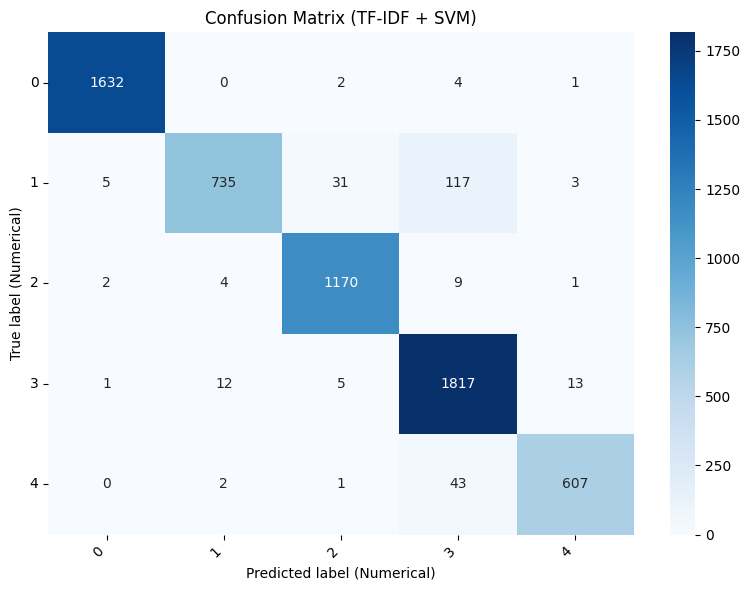

In [ ]:
# Print confusion matrix
print("\nConfusion Matrix (TF-IDF + SVM):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    # Use numerical labels for the tick labels
    tick_labels = np.arange(len(classes))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=tick_labels, yticklabels=tick_labels)
    plt.title(title)
    plt.ylabel('True label (Numerical)')
    plt.xlabel('Predicted label (Numerical)')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Get the unique numerical labels
numerical_labels = sorted(train_df_reduced['label'].unique())

plot_confusion_matrix(cm, numerical_labels, title='Confusion Matrix (TF-IDF + SVM)')

The confusion matrix also visually supported my previous assumption, that the model sometimes mistake robbery for theft.

### Comparative Classification approach

**Context and Motivation**

To compare with our traditional approach, I developed a state-of-the-art deep learning model based on the **BERT** (Bidirectional Encoder Representations from Transformers) architecture. Utilizing pre-trained language representations, this model aims to better capture the semantic nuances inherent in legal texts. To enhance its understanding, I employed a **dual-encoder framework** that processes not only the crime facts but also the relavant legal statutes, enabling the model to comprehend the semantic relationship between each category more effectively.

**Model Architecture**

The core of the model is built upon the BERT base Chinese variant, which serves as a powerful encoder capable of transforming Chinese text into dense, meaningful vector representations. In the dual-encoder framework, both criminal facts and legal statutes are encoded independently using the same shared BERT backbone. This design encourages the model to learn a shared embedding space where semantically related fact-statute pairs are positioned closer together.

Each input pair—comprising a fact and a corresponding statute—is tokenized and passed through the BERT encoder. The final hidden state corresponding to the [CLS] token serves as a holistic representation of the entire sequence. These embeddings are then compared using a contrastive loss function (InfoNCE), which aims to maximize the similarity between correctly matched pairs while distancing mismatched pairs.

**Training Procedure**

The model undergoes training over 10 epochs with early stopping based on validation performance. Key training configurations include:

- **Batch Sizes**: 16 for training, 32 for evaluation
- **Loss Function**: Symmetric contrastive loss, considering both directions—fact-to-statute and statute-to-fact
- **Optimizer**: AdamW with a learning rate of 2e-5
- **Learning Rate Scheduler**: Linear warmup over 10% of total steps, followed by linear decay

During training, the network learns to associate each criminal fact with its correct legal charge by contrasting it against all available statute embeddings. At inference, only the fact encoding is necessary; the predicted charge corresponds to the closest matching statute embedding in the shared space.

Lets' break down my approach step by step.

#### Prepare the legal statutes dataset

As I mentioned in the literature review, domain-specific knowledge integration is an important direction for improving Legal Judgment Prediction (LJP). In this project, I also aim to enhance the model’s semantic understanding by associating each case not just with a numerical label, but also with the relevant legal statute explanation.

To do this, I created a simple dictionary containing the five charges involved in this dataset and their corresponding legal statutes. This dictionary has two key-value pairs for each entry: the name of the charge and the description of the relevant statute (with the sentencing information removed, keeping only the description of the criminal behavior).

It’s important to note that, in reality, the criminal law contains hundreds of charges, each with one or several statute(s) and more judicial interpretations, making the real-world situation much more complex. Here, I have created a simplified model just for this project.

In [ ]:
legal_statutes = [
     {
        "accusation": "[走私、贩卖、运输、制造]毒品",
        "statutes": "走私、贩卖、运输、制造鸦片、海洛因、甲基苯丙胺或者其他毒品。非法持有鸦片、海洛因、甲基苯丙胺或者其他毒品。包庇走私、贩卖、运输、制造毒品的犯罪分子的，为犯罪分子窝藏、转移、隐瞒毒品或者犯罪所得的财物。违反国家规定，非法生产、买卖、运输醋酸酐、乙醚、三氯甲烷或者其他用于制造毒品的原料、配剂，或者携带上述物品进出境。非法种植罂粟、大麻等毒品原植物。非法买卖、运输、携带、持有未经灭活的罂粟等毒品原植物种子或者幼苗。引诱、教唆、欺骗、强迫他人吸食、注射毒品。容留他人吸食、注射毒品。依法从事生产、运输、管理、使用国家管制的麻醉药品、精神药品的人员，违反国家规定，向吸食、注射毒品的人提供国家规定管制的能够使人形成瘾癖的麻醉药品、精神药品。引诱、教唆、欺骗、组织、强迫运动员使用兴奋剂参加国内、国际重大体育竞赛，或者明知运动员参加上述竞赛而向其提供兴奋剂。本法所称的毒品，是指鸦片、海洛因、甲基苯丙胺（冰毒）、吗啡、大麻、可卡因以及国家规定管制的其他能够使人形成瘾癖的麻醉药品和精神药品。"
    },
     {
        "accusation": "抢劫",
        "statutes": "以暴力、胁迫或者其他方法抢劫公私财物。入户抢劫。在公共交通工具上抢劫。抢劫银行或者其他金融机构。多次抢劫或者抢劫数额巨大。抢劫致人重伤、死亡。冒充军警人员抢劫。持枪抢劫。抢劫军用物资或者抢险、救灾、救济物资。犯盗窃、诈骗、抢夺罪，为窝藏赃物、抗拒抓捕或者毁灭罪证而当场使用暴力或者以暴力相威胁。聚众“打砸抢”，致人伤残、死亡，毁坏或者抢走公私财物。"
    },
      {
        "accusation": "故意伤害",
        "statutes": "故意伤害他人身体，致人重伤，致人死亡或者以特别残忍手段致人重伤造成严重残疾。"
    },
    {
        "accusation": "盗窃",
        "statutes": "盗窃公私财物，数额较大的，或者多次盗窃、入户盗窃、携带凶器盗窃、扒窃。盗窃增值税专用发票或者可以用于骗取出口退税、抵扣税款的其他发票。以牟利为目的，盗接他人通信线路、复制他人电信码号或者明知是盗接、复制的电信设备、设施而使用。"
    },
    {
        "accusation": "诈骗",
        "statutes": "诈骗公私财物。"
    }
]

#### Basic setup

Then I imported necessary dependencies and set up the basic settings.

In [ ]:
# import necessary dependencies
!pip install transformers torch scikit-learn tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from transformers import BertModel, BertTokenizer, get_scheduler
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from tqdm.auto import tqdm
import numpy as np
import os
from datetime import datetime

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

✅ Using device: cuda


Next, I loaded the BERT tokenizer that was trained using the same checkpoint as the model I will use later.

In [ ]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-chinese")
print("✅ Tokenizer loaded.")

✅ Tokenizer loaded.


After that, I created a mapping from each accusation (charge) to its corresponding statute and built dictionaries to convert between accusation names and their index values (and vice versa).

By creating these mappings and index conversions, I enabled the model to:
1. Easily look up the statute description for any given accusation, which helps in integrating domain-specific legal knowledge into my model.
2. Convert between textual labels (accusations) and numerical indices, which is necessary for training and evaluating machine learning models, as models typically work with numerical labels.
3. Facilitate efficient data processing and label management throughout my workflow, making it easier to encode, decode, and interpret model predictions.

In [ ]:
# Build accusation -> statute mapping
accusation_to_statute = {item["accusation"]: item["statutes"] for item in legal_statutes}
all_accusations = list(accusation_to_statute.keys())
num_labels = len(all_accusations)
accusation_to_idx = {acc: idx for idx, acc in enumerate(all_accusations)}
idx_to_accusation = {idx: acc for idx, acc in enumerate(all_accusations)}
print("✅ Accusation list:", all_accusations)

✅ Accusation list: ['[走私、贩卖、运输、制造]毒品', '抢劫', '故意伤害', '盗窃', '诈骗']


#### Preprocess dataset

I then prepared my raw data in a format that can be efficiently fed into a neural network. By tokenizing both the case facts and the relevant statutes, I enabled the model to learn from both the factual and legal context of each case. Padding and truncation ensured that all input sequences are of uniform length, which is required for batch processing in deep learning. Packaging everything into a TensorDataset streamlined data loading and batching during model training and evaluation.

In [ ]:
# Preprocess dataset
def preprocess_dataset(df, tokenizer, max_length=512):
    facts = df['fact_cleaned'].tolist()
    statutes = [accusation_to_statute[acc] for acc in df['accusation']]
    labels = df['label'].tolist()

    fact_encodings = tokenizer(facts, truncation=True, padding='max_length', max_length=max_length, return_tensors='pt')
    statute_encodings = tokenizer(statutes, truncation=True, padding='max_length', max_length=max_length, return_tensors='pt')

    return TensorDataset(
        fact_encodings['input_ids'],
        fact_encodings['attention_mask'],
        statute_encodings['input_ids'],
        statute_encodings['attention_mask'],
        torch.tensor(labels)
    )

I organized my data into efficient, ready-to-use batches for model training and evaluation. Using DataLoaders allows me to easily iterate over my data in mini-batches, which is essential for training neural networks efficiently and for leveraging GPU acceleration. Shuffling the training data helps prevent the model from learning the order of the data, which can improve generalization. Separate loaders for validation and test sets ensure I can evaluate my model’s performance on unseen data in a consistent and reproducible way.

The batch size is chosen based on my computing power.

Before training on the entire dataset, I started by experimenting with a small subset of the data. This approach allowed me to quickly test the end-to-end workflow, identify and resolve any bottlenecks or issues in data processing, model training, and evaluation, and ensure that the pipeline was functioning correctly. Once the workflow was proven to be robust and the model was producing reasonable results on the subset, I proceeded to train the model on the full dataset for the final experiments.

In [ ]:
# Create datasets
train_dataset = preprocess_dataset(train_df_reduced, tokenizer)
valid_dataset = preprocess_dataset(valid_df_reduced, tokenizer)
test_dataset = preprocess_dataset(test_df_reduced, tokenizer)

# Dataloaders
batch_size_train = 16
batch_size_eval = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size_eval)
test_loader = DataLoader(test_dataset, batch_size=batch_size_eval)
print(f"✅ Dataset created with {len(train_dataset)} training samples.")

✅ Dataset created with 33856 training samples.


#### Set up model, loss, optimizar, and scheduler

In the next step, I defined a DualEncoder neural network model that uses a shared BERT encoder to process both case facts and statute texts. The model encodes each input (facts and statutes) using the same BERT model and returns their respective embeddings (specifically, the [CLS] token representations).

The rationale behind this design is to map both the factual description of a case and the relevant statute into a shared semantic space using the same encoder. This allows the model to learn comparable representations for both types of text, which is useful for tasks like matching, similarity calculation, or joint reasoning over facts and laws. Using a shared encoder ensures that both inputs are processed in a consistent way, potentially improving the model’s ability to relate facts to statutes and enhancing its semantic understanding for legal judgment prediction.

In [ ]:
# Shared Encoder Model
class DualEncoder(nn.Module):
    def __init__(self, model_name="google-bert/bert-base-chinese"):
        super().__init__()
        self.shared_encoder = BertModel.from_pretrained(model_name)

    def encode(self, input_ids, attention_mask):
        outputs = self.shared_encoder(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state[:, 0, :]  # CLS token

    def forward(self, fact_input_ids, fact_attention_mask, statute_input_ids, statute_attention_mask):
        fact_emb = self.encode(fact_input_ids, fact_attention_mask)
        statute_emb = self.encode(statute_input_ids, statute_attention_mask)
        return fact_emb, statute_emb

I then defined a symmetric contrastive loss function (InfoNCE/NT-Xent) that calculates similarity scores between fact and statute embeddings, computes cross-entropy loss in both directions (fact-to-statute and statute-to-fact), and returns their average as the final loss.

The goal is to train the model so that embeddings of matching fact-statute pairs are close together, while non-matching pairs are far apart in the embedding space. By using a symmetric loss, I ensure the model learns this relationship in both directions, improving its ability to align and distinguish between facts and statutes for better legal judgment prediction.

In [ ]:
# Symmetric Contrastive Loss (InfoNCE / NT-Xent)
def contrastive_loss(fact_emb, statute_emb, temperature=0.05):
    logits_f2s = torch.matmul(fact_emb, statute_emb.T) / temperature
    logits_s2f = logits_f2s.T

    labels = torch.arange(fact_emb.size(0)).to(device)
    loss_f2s = nn.CrossEntropyLoss()(logits_f2s, labels)
    loss_s2f = nn.CrossEntropyLoss()(logits_s2f, labels)

    return (loss_f2s + loss_s2f) / 2

After that, I initialized my dual encoder model and moved it to the appropriate device. I set up the AdamW optimizer for training, and configured a linear learning rate scheduler with a warmup phase, where the learning rate gradually increases at the start and then decreases linearly for the rest of training.

So far, I have prepare all necessary components for effective model training. Using AdamW helps with stable and efficient optimization. The learning rate scheduler with warmup helps prevent instability at the beginning of training and allows for smoother convergence, which can lead to better model performance and generalization.

In [ ]:
# Initialize model, optimizer, scheduler
model = DualEncoder().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Scheduler
num_training_steps = num_epochs * len(train_loader)
num_warmup_steps = int(0.1 * num_training_steps)

lr_scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=num_training_steps
)

#### Set up validation strategy
For evaluation, I defined a function to precompute and store the embeddings for all statute texts. The goal is to speed up evaluation by computing statute embeddings only once, rather than repeatedly during each prediction. This is efficient because the statutes are fixed and do not change, so their embeddings can be reused for comparing against multiple case fact embeddings during evaluation or inference. This approach reduces redundant computation and accelerates the overall evaluation process.

In [ ]:
# Precompute all statute embeddings for evaluation
def get_all_statute_embeddings():
    model.eval()
    embeddings = []
    with torch.no_grad():
        for accusation in all_accusations:
            statute = accusation_to_statute[accusation]
            encoded = tokenizer(statute, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
            emb = model.encode(encoded["input_ids"], encoded["attention_mask"])
            embeddings.append(emb)
    return torch.cat(embeddings)

My evaluation function computes embeddings for the facts in my evaluation dataset, compares them to precomputed statute embeddings, and predicts the most similar statute for each fact. It then collects all predictions and true labels, calculates accuracy and macro F1 score, and prints a detailed classification report and confusion matrix for each round of evaluation.

This approach enables me to systematically assess my model’s performance in matching case facts to the correct statutes. Calculating metrics like accuracy, macro F1, and providing a classification report and confusion matrix gives me a comprehensive understanding of how well my model is performing across all classes, including any imbalances or specific areas where the model may be struggling. This helps guide further model improvements and ensures robust evaluation.

In [ ]:
# Evaluation Function
def evaluate(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    statute_embeddings = get_all_statute_embeddings()

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            fact_ids = batch[0].to(device)
            fact_mask = batch[1].to(device)
            labels = batch[4].to(device)

            fact_embs = model.encode(fact_ids, fact_mask)
            logits = torch.matmul(fact_embs, statute_embeddings.T)
            preds = logits.argmax(dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Get unique labels present in the data
    unique_labels = np.unique(all_labels + all_preds)
    print("Unique labels found in evaluation:", unique_labels)

    acc = accuracy_score(all_labels, all_preds)
    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print("Classification Report:")
    print(classification_report(
        all_labels, all_preds,
        labels=unique_labels,
        target_names=[all_accusations[i] for i in unique_labels],
        digits=4
    ))
    print("Confusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))
    return {"accuracy": acc, "macro_f1": macro_f1}

#### Train the model

Now that everything is ready, I implemented the full training loop for my dual encoder model. For each epoch, I trained the model on the training data, calculated the average training loss, and evaluated the model on the validation set. I also tracked the best macro F1 score on the validation set, saved the model when it improved, and used early stopping to halt training if there was no improvement for several epochs.

By doing so, I iteratively optimized my model while monitoring its performance on unseen validation data. Early stopping prevents overfitting and saves computational resources by stopping training when further improvement is unlikely.

In [ ]:
# Training Loop
num_epochs = 10
best_val_f1 = 0.0
early_stop_patience = 3
no_improvement_epochs = 0
best_model_path = "./best_embedding_model.pt"

# Store training and validation loss for plotting learning curves
train_losses = []
val_accuracies = []

print("🚀 Starting training...")
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]")

    for batch in progress_bar:
        fact_ids, fact_mask, statute_ids, statute_mask, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        fact_emb, statute_emb = model(fact_ids, fact_mask, statute_ids, statute_mask)
        loss = contrastive_loss(fact_emb, statute_emb)
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"✅ Epoch {epoch+1} completed. Avg training loss: {avg_train_loss:.4f}")

    # Validation phase
    val_metrics = evaluate(model, valid_loader)
    val_accuracy = val_metrics["accuracy"]
    val_f1 = val_metrics["macro_f1"]
    val_accuracies.append(val_accuracy)

    # Early stopping & saving best model
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        no_improvement_epochs = 0
        torch.save(model.state_dict(), best_model_path)
        print(f"💾 New best model saved with F1-macro: {best_val_f1:.4f}")
    else:
        no_improvement_epochs += 1
        print(f"⏳ No improvement for {no_improvement_epochs} epoch(s).")

    if no_improvement_epochs >= early_stop_patience:
        print("🛑 Early stopping triggered. Training halted.")
        break

print("✅ Training finished.")

🚀 Starting training...


Epoch 1/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 1 completed. Avg training loss: 70.4143


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9864    0.9875    0.9870       883
             抢劫     0.7132    0.8008    0.7545       472
           故意伤害     0.9362    0.9875    0.9612       639
             盗窃     0.9262    0.7568    0.8330       995
             诈骗     0.7773    0.9716    0.8636       352

       accuracy                         0.8908      3341
      macro avg     0.8679    0.9008    0.8798      3341
   weighted avg     0.8982    0.8908    0.8903      3341

Confusion Matrix:
[[872   2   2   3   4]
 [  2 378  30  46  16]
 [  2   3 631   1   2]
 [  8 147  11 753  76]
 [  0   0   0  10 342]]
💾 New best model saved with F1-macro: 0.8798


Epoch 2/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 2 completed. Avg training loss: 4.1861


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9887    0.9909    0.9898       883
             抢劫     0.8225    0.7754    0.7983       472
           故意伤害     0.9707    0.9844    0.9775       639
             盗窃     0.9093    0.8663    0.8873       995
             诈骗     0.8337    0.9830    0.9022       352

       accuracy                         0.9213      3341
      macro avg     0.9050    0.9200    0.9110      3341
   weighted avg     0.9218    0.9213    0.9206      3341

Confusion Matrix:
[[875   0   1   4   3]
 [  2 366  15  75  14]
 [  2   4 629   1   3]
 [  6  75   3 862  49]
 [  0   0   0   6 346]]
💾 New best model saved with F1-macro: 0.9110


Epoch 3/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 3 completed. Avg training loss: 2.5254


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9966    0.9898    0.9932       883
             抢劫     0.7790    0.8962    0.8335       472
           故意伤害     0.9694    0.9922    0.9807       639
             盗窃     0.9417    0.8603    0.8992       995
             诈骗     0.9330    0.9489    0.9408       352

       accuracy                         0.9342      3341
      macro avg     0.9239    0.9375    0.9295      3341
   weighted avg     0.9376    0.9342    0.9347      3341

Confusion Matrix:
[[874   2   3   4   0]
 [  0 423  13  32   4]
 [  0   2 634   1   2]
 [  3 115   3 856  18]
 [  0   1   1  16 334]]
💾 New best model saved with F1-macro: 0.9295


Epoch 4/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 4 completed. Avg training loss: 2.2208


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9932    0.9921    0.9926       883
             抢劫     0.7627    0.9195    0.8338       472
           故意伤害     0.9813    0.9859    0.9836       639
             盗窃     0.9664    0.8392    0.8983       995
             诈骗     0.9062    0.9886    0.9457       352

       accuracy                         0.9348      3341
      macro avg     0.9220    0.9451    0.9308      3341
   weighted avg     0.9412    0.9348    0.9354      3341

Confusion Matrix:
[[876   3   2   1   1]
 [  1 434   9  23   5]
 [  0   6 630   1   2]
 [  5 126   1 835  28]
 [  0   0   0   4 348]]
💾 New best model saved with F1-macro: 0.9308


Epoch 5/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 5 completed. Avg training loss: 2.1024


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9954    0.9909    0.9932       883
             抢劫     0.8357    0.8623    0.8488       472
           故意伤害     0.9768    0.9890    0.9829       639
             盗窃     0.9454    0.8874    0.9155       995
             诈骗     0.8807    0.9858    0.9303       352

       accuracy                         0.9410      3341
      macro avg     0.9268    0.9431    0.9341      3341
   weighted avg     0.9423    0.9410    0.9411      3341

Confusion Matrix:
[[875   0   1   2   5]
 [  1 407  13  43   8]
 [  0   1 632   1   5]
 [  3  79   1 883  29]
 [  0   0   0   5 347]]
💾 New best model saved with F1-macro: 0.9341


Epoch 6/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 6 completed. Avg training loss: 1.9973


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9989    0.9853    0.9920       883
             抢劫     0.7728    0.9153    0.8380       472
           故意伤害     0.9784    0.9937    0.9860       639
             盗窃     0.9620    0.8402    0.8970       995
             诈骗     0.8830    0.9858    0.9315       352

       accuracy                         0.9339      3341
      macro avg     0.9190    0.9441    0.9289      3341
   weighted avg     0.9398    0.9339    0.9344      3341

Confusion Matrix:
[[870   1   2   5   5]
 [  0 432  11  22   7]
 [  0   1 635   1   2]
 [  1 125   1 836  32]
 [  0   0   0   5 347]]
⏳ No improvement for 1 epoch(s).


Epoch 7/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 7 completed. Avg training loss: 1.9408


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9932    0.9966    0.9949       883
             抢劫     0.8240    0.8729    0.8477       472
           故意伤害     0.9637    0.9969    0.9800       639
             盗窃     0.9552    0.8794    0.9158       995
             诈骗     0.9206    0.9886    0.9534       352

       accuracy                         0.9434      3341
      macro avg     0.9314    0.9469    0.9384      3341
   weighted avg     0.9447    0.9434    0.9433      3341

Confusion Matrix:
[[880   0   2   1   0]
 [  2 412  19  35   4]
 [  0   0 637   1   1]
 [  4  88   3 875  25]
 [  0   0   0   4 348]]
💾 New best model saved with F1-macro: 0.9384


Epoch 8/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 8 completed. Avg training loss: 1.8853


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9921    0.9966    0.9944       883
             抢劫     0.7864    0.9280    0.8513       472
           故意伤害     0.9891    0.9906    0.9898       639
             盗窃     0.9672    0.8603    0.9106       995
             诈骗     0.9328    0.9858    0.9586       352

       accuracy                         0.9440      3341
      macro avg     0.9335    0.9523    0.9409      3341
   weighted avg     0.9488    0.9440    0.9446      3341

Confusion Matrix:
[[880   0   2   0   1]
 [  2 438   5  23   4]
 [  0   4 633   1   1]
 [  5 115   0 856  19]
 [  0   0   0   5 347]]
💾 New best model saved with F1-macro: 0.9409


Epoch 9/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 9 completed. Avg training loss: 1.8402


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9955    0.9955    0.9955       883
             抢劫     0.7676    0.9237    0.8385       472
           故意伤害     0.9906    0.9890    0.9898       639
             盗窃     0.9675    0.8382    0.8982       995
             诈骗     0.8949    0.9915    0.9407       352

       accuracy                         0.9368      3341
      macro avg     0.9232    0.9476    0.9325      3341
   weighted avg     0.9434    0.9368    0.9375      3341

Confusion Matrix:
[[879   0   1   2   1]
 [  1 436   5  21   9]
 [  0   2 632   2   3]
 [  3 130   0 834  28]
 [  0   0   0   3 349]]
⏳ No improvement for 1 epoch(s).


Epoch 10/10 [Training]:   0%|          | 0/2116 [00:00<?, ?it/s]

✅ Epoch 10 completed. Avg training loss: 1.8080


Evaluating:   0%|          | 0/105 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9910    0.9955    0.9932       883
             抢劫     0.7901    0.9089    0.8453       472
           故意伤害     0.9799    0.9922    0.9860       639
             盗窃     0.9617    0.8583    0.9071       995
             诈骗     0.9202    0.9830    0.9505       352

       accuracy                         0.9404      3341
      macro avg     0.9286    0.9476    0.9364      3341
   weighted avg     0.9443    0.9404    0.9408      3341

Confusion Matrix:
[[879   0   2   0   2]
 [  1 429  11  26   5]
 [  0   2 634   2   1]
 [  7 112   0 854  22]
 [  0   0   0   6 346]]
⏳ No improvement for 2 epoch(s).
✅ Training finished.


After 10 epochs, the model finished training without early stop. The final round of validation shows an accuracy of 0.94, which is fair.

Let's first plot the learning curves to visualize my model's performance metrics over time during training.

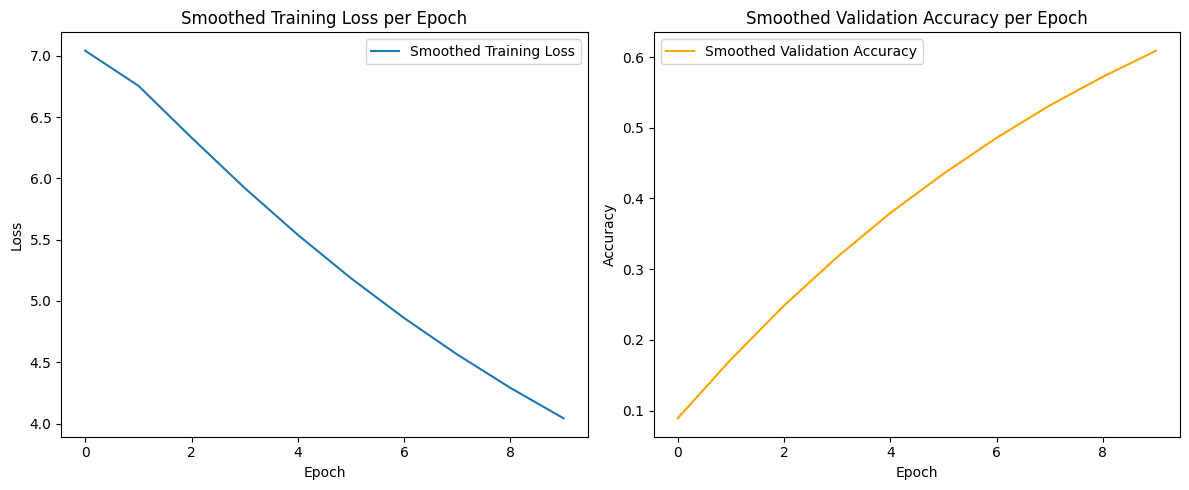

In [ ]:
# Function to smooth a list of values using a moving average
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    last = 0
    for point in points:
        smoothed_value = last * factor + (1 - factor) * point
        smoothed_points.append(smoothed_value)
        last = smoothed_points[-1]
    return smoothed_points

smoothed_train_losses = smooth_curve(train_losses)
smoothed_val_accuracies = smooth_curve(val_accuracies)

plt.figure(figsize=(12, 5))

# Plot Loss curve
plt.subplot(1, 2, 1)
plt.plot(smoothed_train_losses, label='Smoothed Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Smoothed Training Loss per Epoch')
plt.legend()

# Plot Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(smoothed_val_accuracies, label='Smoothed Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Smoothed Validation Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

The plot above show very healthy learning curves, signifying that our training is efficient.

In the loss curve, the loss is high at first and then it gradually decreases over time, indicating that the model is improving and that the model is making better predictions.

In the corresponding accuracy curve, the accuracy curve begins at a low value and increases as training progresses, implying that the model is making more correct predictions over time.





#### Evaluate on the test set

✅ Loaded best model from ./best_embedding_model.pt
🚀 Evaluating on the test set...


Evaluating:   0%|          | 0/195 [00:00<?, ?it/s]

Unique labels found in evaluation: [0 1 2 3 4]
Classification Report:
                 precision    recall  f1-score   support

[走私、贩卖、运输、制造]毒品     0.9976    0.9969    0.9973      1639
             抢劫     0.9144    0.9596    0.9365       891
           故意伤害     0.9832    0.9840    0.9836      1186
             盗窃     0.9859    0.9459    0.9655      1848
             诈骗     0.9371    0.9816    0.9589       653

       accuracy                         0.9723      6217
      macro avg     0.9636    0.9736    0.9683      6217
   weighted avg     0.9731    0.9723    0.9725      6217

Confusion Matrix:
[[1634    0    5    0    0]
 [   2  855   13   12    9]
 [   1   12 1167    3    3]
 [   1   67    1 1748   31]
 [   0    1    1   10  641]]
✨ Final Test Set Results (Embedding Model):
Accuracy: 0.9723
Macro F1-Score: 0.9683


Getting test predictions:   0%|          | 0/195 [00:00<?, ?it/s]

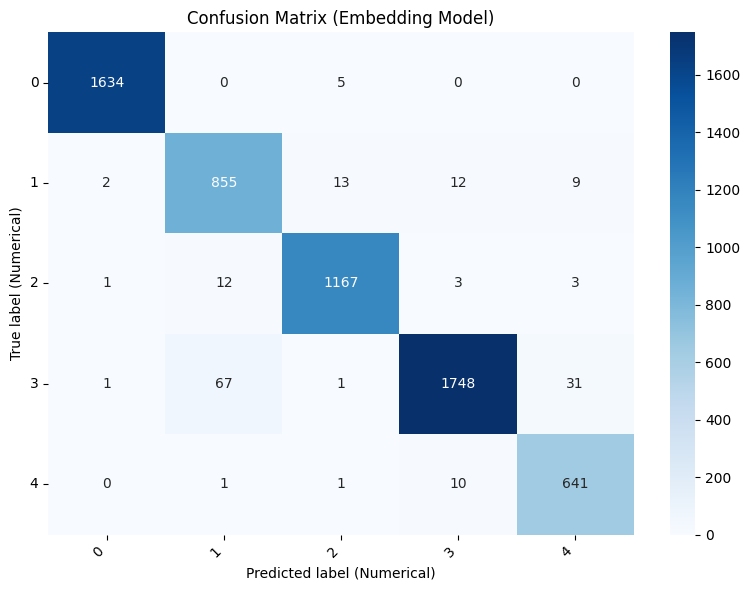


Weighted Average Metrics (Embedding Model):
Precision: 0.9731
Recall: 0.9723
F1-Score: 0.9725


In [ ]:
# Load the best model state dictionary
model.load_state_dict(torch.load(best_model_path))
print(f"✅ Loaded best model from {best_model_path}")

# Evaluate the model on the test set
print("🚀 Evaluating on the test set...")
test_metrics = evaluate(model, test_loader)

# Print final test set results
print("✨ Final Test Set Results (Embedding Model):")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")
print(f"Macro F1-Score: {test_metrics['macro_f1']:.4f}")

# Compute predictions on test set to get confusion matrix for plotting
model.eval()
all_preds = []
all_labels = []
statute_embeddings = get_all_statute_embeddings()

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Getting test predictions"):
        fact_ids = batch[0].to(device)
        fact_mask = batch[1].to(device)
        labels = batch[4].to(device)

        fact_embs = model.encode(fact_ids, fact_mask)
        logits = torch.matmul(fact_embs, statute_embeddings.T)
        preds = logits.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Get the unique numerical labels
numerical_labels = sorted(np.unique(all_labels + all_preds))

# Plot confusion matrix
plot_confusion_matrix(cm, numerical_labels, title='Confusion Matrix (Embedding Model)')

# Calculate and print weighted average metrics separately
report_dict = classification_report(
    all_labels, all_preds,
    labels=numerical_labels,
    target_names=[all_accusations[i] for i in numerical_labels],
    digits=4,
    output_dict=True
)

weighted_precision = report_dict['weighted avg']['precision']
weighted_recall = report_dict['weighted avg']['recall']
weighted_f1 = report_dict['weighted avg']['f1-score']

print("\nWeighted Average Metrics (Embedding Model):")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-Score: {weighted_f1:.4f}")


After the model has done training, I evaluated it on the test set. The overall performance shows an accuracy rate of 97.23% and a macro F1-score of 96.83%, which are very strong results, suggesting that my embedding-based model has learned meaningful representations of legal facts and mapped them effectively to their corresponding legal statutes.

The confusion matrix shows that most confusion occurs between theft (盗窃) and robbery (抢劫)/fraud (诈骗). 67 instances of theft cases were misclassified as robbery, 31 as fraud. This suggests that while the model is very strong, it still struggles occasionally with semantically close offenses — something even human judges may debate.

## III. Conclusions

### Performance Analysis & Comparative Discussion

Both the statistical (TF-IDF + SVM) and embedding-based models demonstrate strong performance on the five-class legal judgment prediction task, with overall accuracies of 0.96 and 0.9723, respectively. The embedding model marginally outperforms the statistical model across most metrics, but the difference is not substantial.

#### Key Performance Insights

The embedding model shows consistent minor improvements across most crime categories, particularly in distinguish the nuance semantic difference between theft and robbery. In confusion matrices, embedding model showed only 67+12 theft/robbery confusions while statistical model made 117+12 mistakes. Both models achieved near-perfect performance on drug-related crimes, suggesting clear linguistic patterns distinguish these cases.

#### Critical Evaluation

Advantages of the Statistical Model:
- Simplicity and interpretability.
- Fast training and inference.
- Performs very well on well-structured, balanced datasets, as seen here.

Advantages of the Embedding Model:
- Captures deeper semantic relationships in text.
- Marginally better performance, especially in classes with more complex language or less data.
- Potential for further improvement with advanced architectures and hyperparameter tuning.

Disadvantages:
- The statistical model may struggle with more complex, noisy, or sparse data.
- The embedding model requires more computational resources and is less interpretable.

#### Discussion & Hypotheses

The small performance gap can be attributed to the dataset's characteristics: it is large, well-structured, and reduced to a manageable five-class problem. This likely makes the task relatively easy, allowing the statistical model to perform near its ceiling. In scenarios with more classes, noisier data, or less structure, the embedding model's ability to capture nuanced semantics would likely yield a larger advantage.

Additionally, the statistical model benefited from thorough preprocessing, while the embedding model was not fully optimized (e.g., limited epochs, no advanced mechanisms like cross-attention). This suggests that the statistical model may be close to its best possible performance, whereas the embedding model could improve further with more sophisticated training.

#### When to Prefer Each Model

Statistical models are preferable for quick deployment on clean, well-structured datasets or when interpretability and speed are priorities.

Embedding-based models are better suited for complex, noisy, or semantically rich data, or when the highest possible accuracy is required and computational resources are available.

Future work could explore these models on more challenging datasets to better understand their relative strengths and limitations.

### Project Summary and Reflections

This project provided a valuable learning experience in applying both statistical and embedding-based models to the task of legal judgment prediction. Through hands-on experimentation, I gained a deeper understanding of the strengths and limitations of each approach, as well as the practical considerations involved in deploying NLP models in real-world legal scenarios.

The statistical model (TF-IDF + SVM) proved to be highly effective on a well-structured, large-scale dataset, offering simplicity, speed, and interpretability. The embedding-based model, while requiring more computational resources and expertise, demonstrated a marginally higher performance and greater potential for handling complex or nuanced language. This highlighted the importance of model selection based on data characteristics, resource availability, and application requirements.

Both model types have significant potential in legal informatics, such as automating case classification, assisting legal professionals in document review, and supporting judicial decision-making. The statistical approach is practical for rapid deployment in environments with clean, balanced data, while embedding-based models are better suited for more challenging, diverse, or semantically rich legal texts.

This work contributes to the legal judgment prediction field by demonstrating that, under certain conditions, traditional statistical methods can perform competitively with more advanced embedding models. The methodology and findings are transferable to other domain-specific classification tasks, especially where data is well-structured and class distributions are balanced. However, for domains with long-tail distributions, sparse data, or complex semantics, further adaptation and advanced modeling techniques might be necessary.

In summary, this project demonstrates the feasibility and limitations of current NLP approaches in legal judgment prediction, and lays the groundwork for more robust, interpretable, and generalizable solutions in the future. The insights gained here are not only applicable to legal AI, but also to other domains where accurate, explainable, and fair automated decision-making is critical.

## References

[1] Intisar Almuslim and Diana Inkpen. 2022. *Legal Judgment Prediction for Canadian Appeal Cases*. https://doi.org/10.1109/cdma54072.2022.00032

[2] Wentao Deng, Jiahuan Pei, Keyi Kong, Zhe Chen, Furu Wei, Yujun Li, Zhaochun Ren, Zhumin Chen, and Pengjie Ren. 2023. Syllogistic Reasoning for legal judgment analysis. *Proceedings of the 2021 Conference on Empirical Methods in Natural Language Processing* (January 2023), 13997–14009. https://doi.org/10.18653/v1/2023.emnlp-main.864

[3] Nasa Zata Dina, Sri Devi Ravana, and Norisma Idris. 2025. Legal Judgment Prediction using Natural Language Processing and Machine Learning Methods: A Systematic Literature Review. *SAGE Open 15*, 2 (April 2025). https://doi.org/10.1177/21582440251329663

[4] Yi Feng, Chuanyi Li, and Vincent Ng. 2022. Legal Judgment Prediction: A survey of the state of the art. *Proceedings of the Thirty-First International Joint Conference on Artificial Intelligence* (July 2022), 5461–5469. https://doi.org/10.24963/ijcai.2022/765

[5] Ang Li, Yiquan Wu, Ming Cai, Adam Jatowt, Xiang Zhou, Weiming Lu, Changlong Sun, Fei Wu, and Kun Kuang. 2025. Legal Judgment Prediction based on Knowledge-enhanced Multi-Task and Multi-Label Text Classification. *Proceedings of the 2025 Conference of the Nations of the Americas Chapter of the Association for Computational Linguistics: Human Language Technologies (Volume 1: Long Papers)* (April 2025), 6957–6970. https://doi.org/10.18653/v1/2025.naacl-long.355

[6] Joel Niklaus, Matthias Stürmer, and Ilias Chalkidis. 2022. An Empirical study on Cross-X transfer for legal Judgment prediction. arXiv (Cornell University) (January 2022). https://doi.org/10.48550/arxiv.2209.12325

[7] Leonardo Rigutini, Achille Globo, Marco Stefanelli, Andrea Zugarini, Sinan Gultekin, and Marco Ernandes. 2024. Performance, Energy Consumption and Costs: A comparative analysis of automatic text classification approaches in the legal domain. *International Journal on Natural Language Computing* 13, 1 (February 2024), 19–35. https://doi.org/10.5121/ijnlc.2024.13102

[8] Gil Semo, Dor Bernsohn, Ben Hagag, Gila Hayat, and Joel Niklaus. 2022. ClassActionPrediction: A challenging benchmark for legal judgment prediction of class action cases in the US. arXiv (Cornell University) (January 2022). https://doi.org/10.48550/arxiv.2211.00582

[9] Yongjun Wang, Jing Gao, and Junjie Chen. 2020. Deep Learning Algorithm for Judicial Judgment Prediction based on BERT. *2020 5th International Conference on Computing, Communication and Security (ICCCS)* 46, (October 2020), 1–6. https://doi.org/10.1109/icccs49678.2020.9277068

[10] Chaojun Xiao, Haoxi Zhong, Zhipeng Guo, Cunchao Tu, Zhiyuan Liu, Maosong Sun, Yansong Feng, Xianpei Han, Zhen Hu, Heng Wang, and Jianfeng Xu. 2018. CAIL2018: A Large-Scale Legal Dataset for Judgment Prediction. arXiv (Cornell University) (January 2018). https://doi.org/10.48550/arxiv.1807.02478

[11] Nuo Xu, Pinghui Wang, Long Chen, Li Pan, Xiaoyan Wang, and Junzhou Zhao. 2020. Distinguish Confusing Law Articles for Legal Judgment Prediction. *Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics* (July 2020), 3086–3095. https://doi.org/10.18653/v1/2020.acl-main.280

[12] Zhuopeng Xu, Xia Li, Yinlin Li, Zihan Wang, Yujie Fanxu, and Xiaoyan Lai. 2020. Multi-task legal judgement prediction combining a subtask of the seriousness of charges. In Lecture notes in computer science. 415–429. https://doi.org/10.1007/978-3-030-63031-7_30

[13] Qihui Zhao. 2025. Legal judgment prediction via legal knowledge extraction and fusion. *Journal of King Saud University - Computer and Information Sciences* 37, 3 (April 2025). https://doi.org/10.1007/s44443-025-00019-0